In [0]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np
import cv2

# load the saved model
myloadedmodel = load_model('/face_mask_model1.h5')

In [24]:


test_image = image.load_img('/010.jpg', target_size = (224, 224)) 
test_image = image.img_to_array(test_image)
test_image = preprocess_input(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = myloadedmodel.predict(test_image)

print(result[0][0])

if result[0][0] < 0.5:
    prediction = 'with_mask'
else:
    prediction = 'without_mask'

prediction

2.6967236e-06


'with_mask'

In [0]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('/haarcascade_frontalface_default.xml')


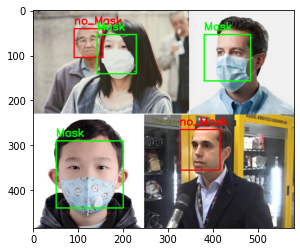

In [26]:
# Read the input image
img = cv2.imread('/main_test1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 5)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    face = img[y:y+h, x:x+w]
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face = cv2.resize(face, (224, 224))
    face = image.img_to_array(face)
    face = preprocess_input(face)
    face = np.expand_dims(face, axis = 0)
    result = myloadedmodel.predict(face)
    if result[0][0] < 0.5:
      prediction = 'Mask'
    else:
      prediction = 'no_Mask'

    color = (0, 255, 0) if prediction == 'Mask' else (255, 0, 0)

    cv2.putText(img, prediction, (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
    
    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
    
# Display the output
plt.imshow(img)
plt.show()